In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moai/Iris_test_datav2.csv
/kaggle/input/moai/Iris_train_data.csv
/kaggle/input/moai/Iris_test_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train_data = pd.read_csv('/kaggle/input/moai/Iris_train_data.csv')
test_data = pd.read_csv('/kaggle/input/moai/Iris_test_datav2.csv')
print(train_data.columns)
print(train_data.shape)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'StemDiameterMm', 'LeafAngleDegree', 'FlowerHeightCm', 'BractWidthMm',
       'Species'],
      dtype='object')
(120, 10)


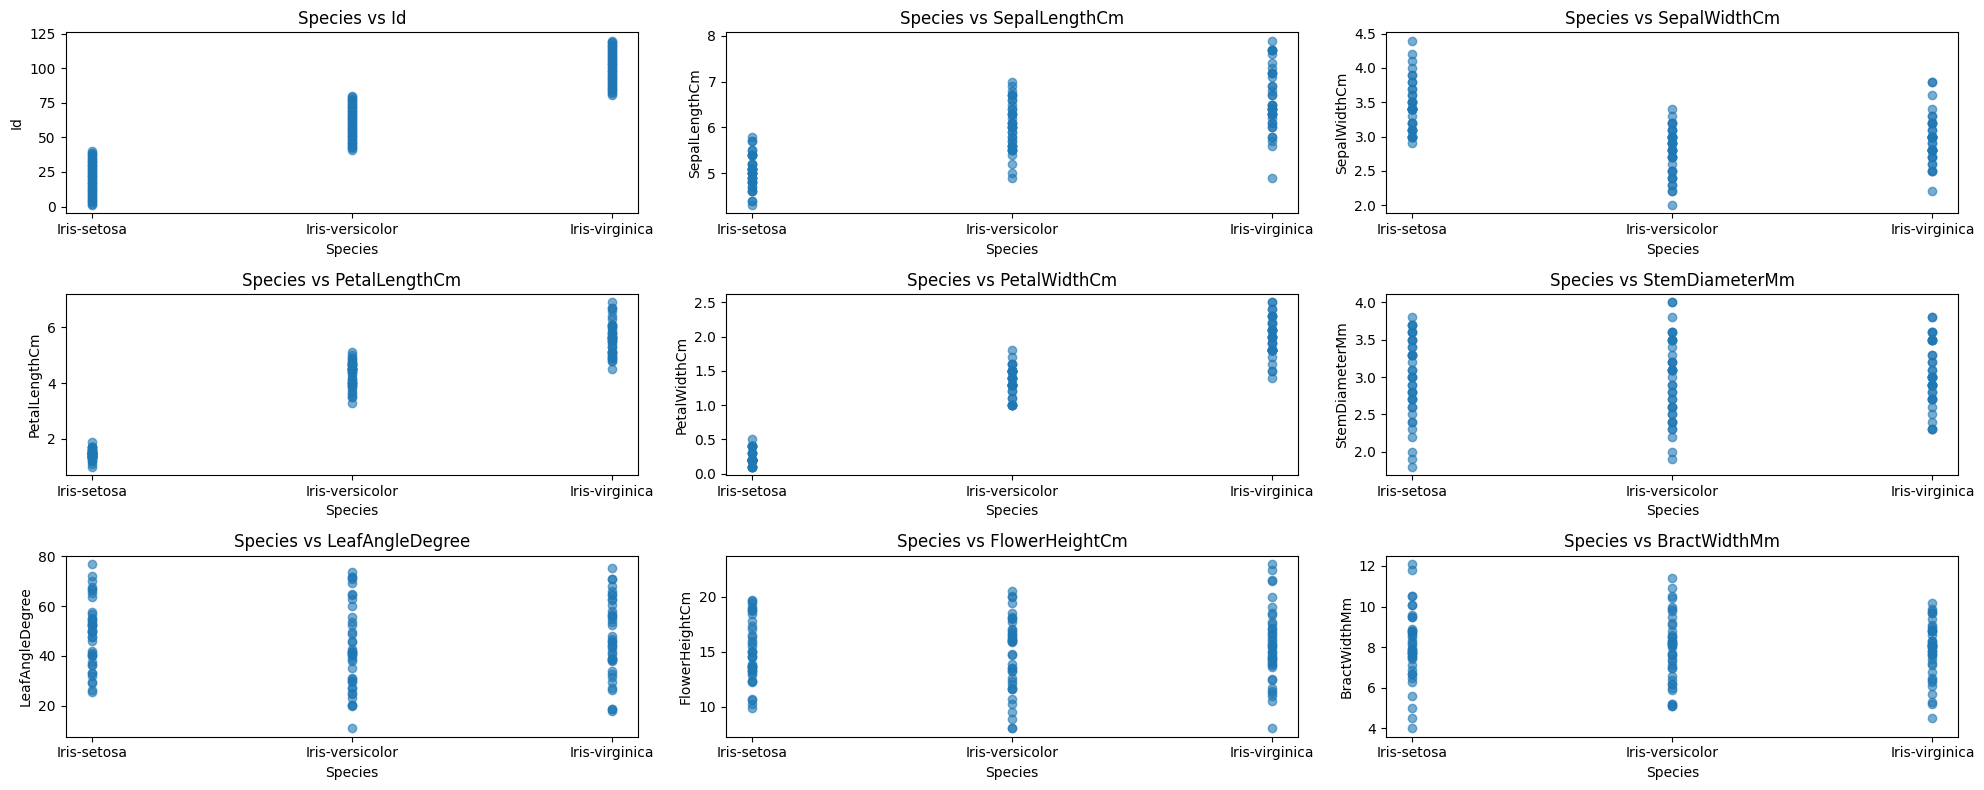

In [4]:
fig, axes = plt.subplots(3,3, figsize=(20,8))
axes = axes.flatten()
#Id：ID   SepalLengthCm：萼片长度 厘米   SepalWidthCm：萼片宽度 厘米   PetalLengthCm：花瓣长度 厘米   PetalWidthCm：花瓣宽度 厘米   StemDiameterMm：茎直径 毫米
#LeafAngleDegree：叶角度 度   FlowerHeightCm：花高 厘米   BractWidthMm：苞片宽度 毫米   Species：品种
columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','StemDiameterMm', 'LeafAngleDegree', 'FlowerHeightCm', 'BractWidthMm']
for i, col in enumerate(columns):
    axes[i].scatter(train_data['Species'], train_data[col], alpha=0.6)
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Species vs {col}')

plt.tight_layout()
plt.show()

In [5]:
X_train = train_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','StemDiameterMm', 'LeafAngleDegree', 'FlowerHeightCm', 'BractWidthMm']]
Y_train = train_data['Species']
X_test  = test_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','StemDiameterMm', 'LeafAngleDegree', 'FlowerHeightCm', 'BractWidthMm']]
ID_test = test_data['Id']

In [6]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
print(Y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [7]:
x_train, x_vol, y_train, y_vol = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
model = LogisticRegression()
#model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = model.predict(x_vol)
accuracy = accuracy_score(y_vol, y_pred)
print(f"模型的准确度为: {accuracy:.4f}")

模型的准确度为: 0.8333


In [9]:
predictions = model.predict(X_test).tolist()
print(predictions)
for idx, value in enumerate(predictions):
    if value == 0:
        predictions[idx] = 'Iris-setosa'
    elif value == 1:
        predictions[idx] = 'Iris-versicolor'
    else:
        predictions[idx] = 'Iris-virginica'

#print(predictions)
#result_df = pd.DataFrame({'Id': ID_test,'Species': predictions})
#result_df.to_csv('/kaggle/working/1.csv', index=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2]
